# <center>Wpływ danych raportów kwartalnych na przyszłe stopy zwrotu z rynku akcji</center>

### <center><i>Michał Murawski</i></center>

## Sformułowanie celu


Celem badania będzie zweryfikowanie następującej hipotezy...

**Dane publikowane kwartalnie przez spółki, są w stanie przewidzieć stopy zwrotu w następnych kwartałach**

Niech

* $f$ - będzie klasyfikatorem

* $x_{1,i},..., x_{1,n}$ - to parametry publikowane kwartalnie przez firmę w dokumentach takich jak `balance sheet`, `income statement`, `cash flow statement`, `financial ratios` w kwartale $i$

* $R_{i + h}$ - to stopa zwrotu w horyzoncie inewstycyjnym $h$ licząc od kwartału $i$

$f(x_{1,i},..., x_{1,n}) = 
\begin{cases} 
1 & \text{jeśli } log(R_{i + h}) > 0 \\
0 & \text{jeśli } log(R_{i + h}) \leq 0 
\end{cases}
$

## Dane

Dane kwartalne zostały pobrane przy użyciu biblioteki `scrapy` ze strony [macrotredns.com](https://macrotredns.com) dla indeksu [S&P500](https://github.com/datasets/s-and-p-500-companies/blob/main/data/constituents.csv), dane dotyczące cen akcji zostały pobrane z [yahoo finance](http://finance.yahoo.com) przy wykorzystaniue biblioteki [yfinance](https://pypi.org/project/yfinance/)

Do tego celu został zaimplementowany scraper, który pobrał dane z dotyczące `balance sheet`, `income statement`, `cash flow statement`, `financial ratios` ze wszystkich obecnie notowanych spółek w indeksie *S&P500*

<center><i><b>Scraper z powodzeniem pobrał dane 501 spółek na 504 obecnie notowanych</b></i></center>

In [29]:
!ls -1 sp500/balance-sheet/ | wc -l
!tree sp500 | head -n10

     501
sp500
├── balance-sheet
│   ├── A.csv
│   ├── AAPL.csv
│   ├── ABBV.csv
│   ├── ABNB.csv
│   ├── ABT.csv
│   ├── ACGL.csv
│   ├── ACN.csv
│   ├── ADBE.csv


## Wstępna ocena danych



In [100]:
import pandas as pd

data = pd.read_csv("sp500/data.csv")
data['date'] = pd.to_datetime(data['date'])
min_date = data['date'].min()
max_date = data['date'].max()
num_of_nans = (data.isna().sum()/len(data) * 100).sort_values(ascending=False)
print(len(num_of_nans[num_of_nans>0])/len(num_of_nans))
print(min_date, max_date)
data = data.set_index(keys=['date', 'ticker'])

0.5578947368421052
2009-01-31 00:00:00 2024-11-30 00:00:00


In [87]:
print(num_of_nans[num_of_nans>0].to_string())

other_income                                   97.041221
other_share_holders_equity                     82.607088
net_change_in_intangible_assets                77.731827
research_development_expenses                  65.163742
income_from_discontinued_operations            48.103692
pre_paid_expenses                              46.533522
net_change_in_short_term_investments           39.745142
long_term_investments                          37.458812
change_in_accounts_payable                     34.123462
other_current_assets                           31.561428
inventory_turnover                             30.653621
inventory                                      29.386053
net_current_debt                               28.911976
change_in_inventories                          26.423912
other_operating_income_expenses                26.306234
net_change_in_long_term_investments            16.175778
days_sales_in_receivables                      14.753547
receiveable_turnover           

In [88]:
data.describe()

,current_ratio,long_term_debt_capital,debt_equity_ratio,gross_margin,operating_margin,ebit_margin,pre_tax_profit_margin,net_profit_margin,asset_turnover,inventory_turnover,...,net_cash_flow,stock_based_compensation,common_stock_dividends_paid,net_change_in_short_term_investments,other_share_holders_equity,other_operating_income_expenses,income_from_discontinued_operations,net_change_in_intangible_assets,pre_paid_expenses,other_income
count,25607.000000,29112.000000,29364.000000,25607.000000,28570.000000,28570.000000,29742.000000,29742.000000,29742.000000,20625.000000,...,29742.000000,25381.000000,25467.000000,17921.000000,5173.000000,21918.000000,15435.000000,6623.000000,15902.000000,880.000000
mean,1.863020,0.523327,1.126338,47.371490,12.411382,12.386981,10.618875,5.729484,0.183846,3.151503,...,58.480548,59.680354,-256.472414,-97.040159,654.578104,-323.227581,14.632162,-29.586992,418.993121,7.837288
std,1.445898,9.504674,37.938165,125.851017,215.605050,215.399494,337.807589,336.111365,0.170664,14.662283,...,3875.013851,252.669868,495.667150,4507.371674,4585.834212,2268.772960,374.181463,598.390875,855.154939,128.003467
min,0.000000,-71.366600,-1294.600000,-6379.194000,-18427.940000,-18427.940000,-44144.000000,-44199.740000,-0.789100,-6.045700,...,-140304.000000,-1885.000000,-7304.000000,-124053.000000,-22884.000000,-50787.000000,-17356.000000,-44783.000000,0.000000,-71.693000
25%,1.036400,0.248200,0.314200,29.360450,8.578325,8.578325,6.898850,5.030325,0.076100,0.798200,...,-129.000000,5.927000,-238.000000,-2.155000,0.000000,-36.975000,0.000000,-0.800000,34.094500,0.000000
50%,1.467400,0.396500,0.674700,44.880700,15.445500,15.465600,13.658200,10.435850,0.141900,1.304800,...,5.944500,15.116000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.360500,0.000000
75%,2.227700,0.551025,1.225200,66.048950,23.785700,23.840950,22.712325,17.982500,0.233500,2.483000,...,170.787250,39.000000,-28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,387.840500,0.000000
max,21.988700,1500.000000,5579.360000,16433.330000,19700.000000,19700.000000,21966.670000,13666.670000,2.634900,1505.057000,...,183463.000000,7127.000000,3199.000000,113971.000000,77703.000000,9749.000000,21719.000000,2309.000000,20861.000000,3723.479000


<Axes: >

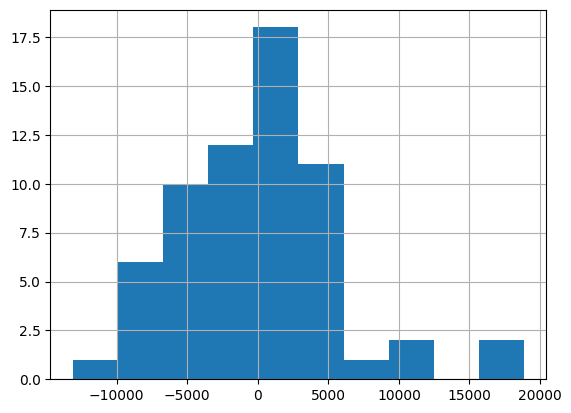

In [99]:
data_ = data.reset_index().dropna(axis=1)
data_.loc[data_['ticker'] == "AAPL"]['net_cash_flow'].hist()

## Wstępna ocena danych

* Dane udało się pobrać z powodzeniem od dla 501 firm
* W sumie ok 24 tys. wierszy po 93 kolumny
* Przedziale czasowym 2009-01-31 do 2024-11-30
* Braki w danych występują w ok. 55% rekordów. Główne czynniki braków: 
    - Zmieniające się regulacje SEC dot wymagań w raportach kwartalnych
    - Preferencje firmy
    - Typ firmy (np. banki często nie notują marży brutto)

## Przygotowanie danych

### Oczyszczenie danych

* Jeśli któryś z raportów `balance sheet`, `income statement`, `cash flow statement`, `financial ratios` nie był obecny firma nie była uwzględniana
* Z danych zostały usunięte firmy, z którką historią raportowania - uwzlędniłem tylko firmy z conajmniej 20 raportami kwartalnymi
* Brakujące dane wypełniłem zerami

### Wzbogacanie danych

dane zostały wzbogacone o następujące parametry...

* parametry które opisują dynamikę zmian wcześniej istniejących parametrów w różnych przedziałach np. `gross_margin_20_quartes_gain`, `gross_margin_16_quartes_gain`, `gross_margin_20_quartes_gain`
* percentyle dot. poszczególnych parametrów - w celu określenia jak binzes odstane na tle innych np. `gross_margin_percentile_in_index`, `gross_margin_percentile_in_industry`
* dane zostały wzbogacone o takie parametry jak cena, logarytm z przyszłych stóp zwrotu dla następnych 4 kwartałów
    `price`, `log_return_q1`, `log_return_q2`, `log_return_q3`, `log_return_q4` 
* binarne klasy do klasyfikacji
    - `class_1` - 1 kiedy notowane są wzrosty (`class_1_q1`, `class_1_q2`, `class_1_q3`, `class_1_q4`)
    - `class_2` - 1 kiedy notowane są wzroty powyżej głównego indeksu S&P500
* różnice pomiędzy zwrotami, a zwrotami z S&P500 do badania korelacji

In [103]:
Y = pd.read_csv("sp500/target.csv")
Y.tail()

,date,ticker,price,log_return_q1,log_return_q2,log_return_q3,log_return_q4,class_1_q1,class_1_q2,class_1_q3,class_1_q4,class_2_q1,class_2_q2,class_2_q3,class_2_q4,diff_q1,diff_q2,diff_q3,diff_q4
28365,2024-12-31,XYL,116.019997,-0.137318,-0.150718,-0.099846,0.025387,0,0,0,1,0,0,0,0,-0.159766,-0.225015,-0.212623,-0.184137
28366,2024-12-31,YUM,134.160004,-0.012970,0.022564,-0.018206,0.046140,0,1,0,1,0,0,0,0,-0.035418,-0.051734,-0.130984,-0.163383
28367,2024-12-31,ZBH,105.392784,0.011255,-0.022644,-0.216389,-0.133305,1,0,0,0,0,0,0,0,-0.011193,-0.096941,-0.329166,-0.342828
28368,2024-12-31,ZBRA,386.220001,0.051809,0.223292,0.247836,0.345727,1,1,1,1,1,1,1,1,0.029361,0.148995,0.135059,0.136204
28369,2024-12-31,ZTS,162.929993,-0.151495,-0.057307,-0.030230,-0.181904,0,0,0,0,0,0,0,0,-0.173943,-0.131604,-0.143008,-0.391427


## Selekcja danych

Mając oczyszczone dane została przeprowadzona selekcja atrybutów na podstawie korelacji korelacje zostały zbadane dla logarytmów z przyszłych stóp zwrotu i rożnicy ze stopami zwrotu z głównym indeksem

In [356]:
import matplotlib.pyplot as plt

HORIZON = 4
correlation_data = dict()
features_for_correlations = [f'log_return_q{i}' for i in range(1, HORIZON + 1)] + [f'diff_q{i}' for i in range(1, HORIZON + 1)]

for feat in features_for_correlations:
    correlation_data[feat] = pd.read_csv(f'sp500/features_correlation_{feat}.csv')

def plot_correlation(data, title='Feature correlations with targets'):
    fig, axs = plt.subplots(len(data)// 4, 4)

    for i, feat in enumerate(data.keys()):
        row = i % 4
        col = (i // 4)
        x = data[feat].dropna()
        x = x.loc[x['p-value'] < 0.05]
        positive_df = x.loc[x['correlation'] > 0]
        negative_df = x.loc[x['correlation'] < 0]
        axs[col][row].scatter(positive_df['correlation'], positive_df['p-value'], c='blue', label=f'Positive Correlation with {feat}', alpha=0.03)
        axs[col][row].scatter(negative_df['correlation'], negative_df['p-value'], c='red', label=f'Negative Correlation with {feat}', alpha=0.03)
        axs[col][row].set_xlabel('correlation')
        axs[col][row].set_ylabel('p-value')
        axs[col][row].set_title(f"{feat}")
        axs[col][row].grid(linestyle='--')

    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.suptitle('Feature correlations with targets')


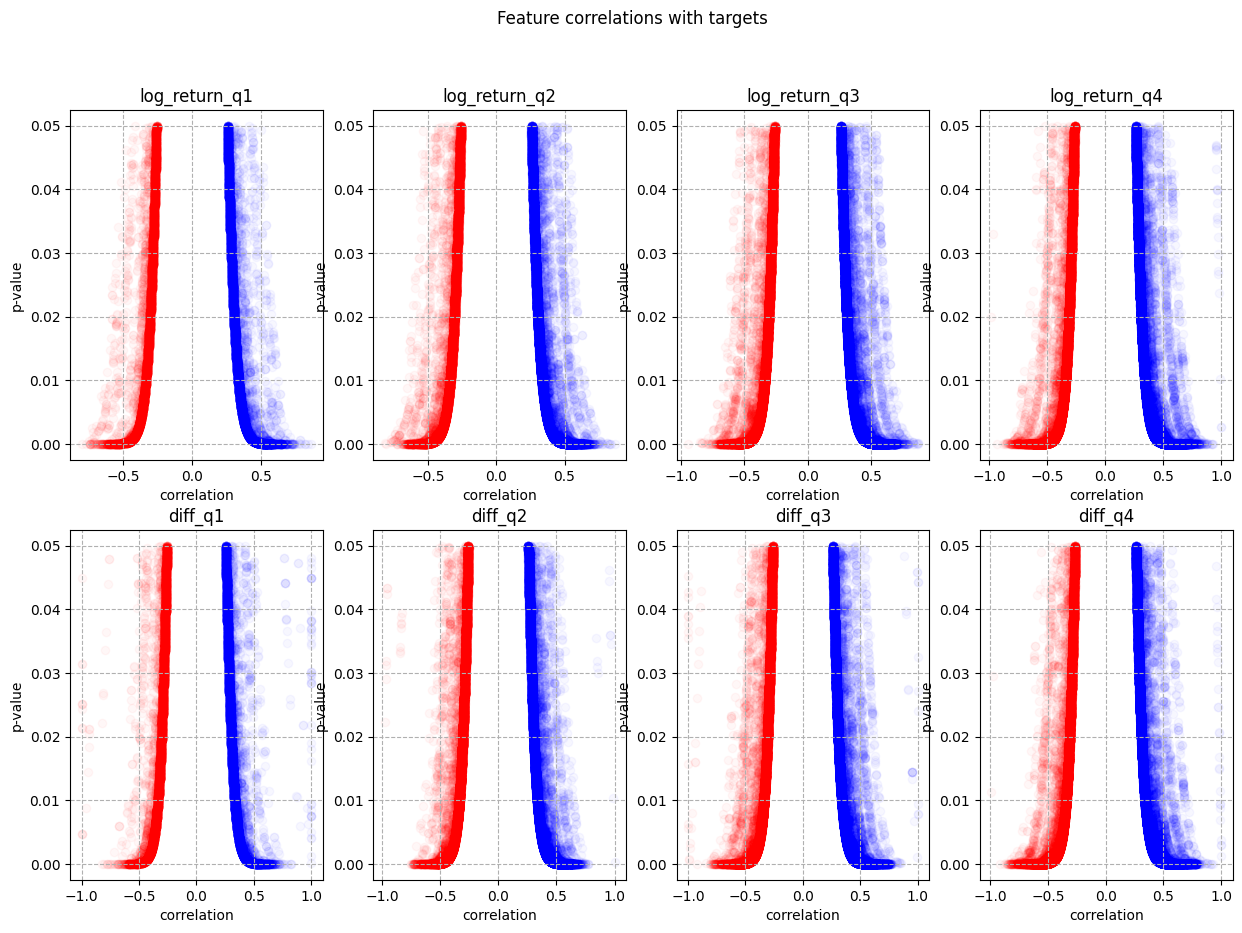

In [357]:
plot_correlation(correlation_data)

In [358]:
def analyze_features(df):
    features = df['feature'].unique()
    results = []
    
    total_companies = len(df['ticker'].unique())
    
    for feature in features:
        feature_data = df[df['feature'] == feature]
        significant_results = feature_data[feature_data['p-value'] < 0.05]

        neg = len(significant_results.loc[significant_results['correlation'] < 0.0])
        pos = len(significant_results.loc[significant_results['correlation'] > 0.0])

        significance_ratio = len(significant_results) / total_companies
        avg_correlation = significant_results['correlation'].mean()
        
        results.append({
            'feature': feature,
            'significance': significance_ratio,
            'avg_correlation_significant': avg_correlation,
            'csi': (pos-neg)/(pos+neg) if (pos+neg) else 0.0,
            'abs(csi)': abs((pos-neg)/(pos+neg)) if (pos+neg) else 0.0,

        })
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('significance', ascending=False)
    
    return results_df

analyzed_features = {}
significance_threshold = 0.12
value_threshold = 0.6

for k in correlation_data:
    x = analyze_features(correlation_data[k].reset_index())
    x = x.dropna()
    x = x.sort_values(by=['significance', 'abs(csi)'], ascending=False)
    analyzed_features[k] = x
    selected_features = x.loc[x['significance']> significance_threshold].loc[x['abs(csi)']> value_threshold]['feature'].to_list()
    num_of_features = len(selected_features)
    print(f"num of features for {k} significance threshold {significance_threshold}, abs(csi)_threshold {value_threshold}: {num_of_features}")


import re
from collections import defaultdict

def reduce_features_set(features_set, df):
    similar_features = defaultdict(list)
    for feat in features_set:
        res = re.split(r'_\d+_', feat)
        if len(res) == 1:
            similar_features[res[0]].append(feat)
        else:
            similar_features["_x_".join(res)].append(feat)

    selected_features = []
    for i, k in enumerate(similar_features):
        if len(similar_features[k]) > 1:    
            similar_features_to_select = []
            for feat in similar_features[k]:
                s = df.loc[df['feature']== feat][['significance', 'avg_correlation_significant', 'csi', 'abs(csi)']].values[0][1]
                similar_features_to_select.append((feat, s))
            selected = max(similar_features_to_select, key=lambda x:x[1])[0]
            selected_features.append(selected)
        else:
            selected_features.append(k)
    return list(set(selected_features))

x = analyzed_features['diff_q3']
x = x.loc[x['significance']> 0.2].loc[x['abs(csi)']> 0.8]
reduced_features = reduce_features_set(x['feature'].to_list(), x)
significant_features = x.loc[x['feature'].isin(reduced_features)]

num of features for log_return_q1 significance threshold 0.12, abs(csi)_threshold 0.6: 46
num of features for log_return_q2 significance threshold 0.12, abs(csi)_threshold 0.6: 212
num of features for log_return_q3 significance threshold 0.12, abs(csi)_threshold 0.6: 240
num of features for log_return_q4 significance threshold 0.12, abs(csi)_threshold 0.6: 220
num of features for diff_q1 significance threshold 0.12, abs(csi)_threshold 0.6: 40
num of features for diff_q2 significance threshold 0.12, abs(csi)_threshold 0.6: 186
num of features for diff_q3 significance threshold 0.12, abs(csi)_threshold 0.6: 200
num of features for diff_q4 significance threshold 0.12, abs(csi)_threshold 0.6: 174


Dane zostały przefiltrowane dla poziomu `significance` > 0.2 i `abs(cis)` > 0.8

* `significance` - udział firm dla których artybut ma p-value < 0.05
* `avg_correlation_significant` - średnia korelacja artrybutu (tylko tych p-value < 0.05)
* `csi` - (Correlation Sign Index) - indeks odzwieciedlający dominację pozytywnych/negatywnych korelacji (+/- 1.0 - wszystkie pozytywne/negatywne)

In [362]:
significant_features.head(10)

,feature,significance,avg_correlation_significant,csi,abs(csi)
513,net_property_plant_equipment,0.365702,-0.317511,-0.819209,0.819209
459,total_long_term_assets,0.347107,-0.335269,-0.845238,0.845238
589,operating_income_3_quartes_gain,0.314050,0.371795,0.921053,0.921053
465,total_depreciation_amortization_cash_flow,0.305785,-0.310007,-0.824324,0.824324
286,pre_tax_income_3_quartes_gain,0.301653,0.390372,0.945205,0.945205
19,asset_turnover,0.297521,0.316015,0.805556,0.805556
136,ebit_3_quartes_gain,0.289256,0.364525,0.914286,0.914286
40,gross_profit_3_quartes_gain,0.283058,0.364731,0.883212,0.883212
669,income_after_taxes_3_quartes_gain,0.278926,0.373847,0.940741,0.940741
568,roa_5_quartes_gain,0.278926,0.374066,0.940741,0.940741


In [355]:
from copy import copy

feature_selection = defaultdict(list)

for target in analyzed_features:
    x = analyzed_features[target]
    print(target)
    x = x.loc[x['significance']> 0.2].loc[x['abs(csi)']> 0.8]
    #reduced_features = reduce_features_set(x['feature'].to_list(), x)
    significant_features = x['feature'].to_list()
    feature_selection[target] = significant_features
    print(len(significant_features))

reduced_correlation_data = copy(correlation_data)

for target in feature_selection:
    reduced_correlation_data[target] = reduced_correlation_data[target].loc[reduced_correlation_data[target]['feature'].isin(feature_selection[target])]

log_return_q1
0
log_return_q2
45
log_return_q3
75
log_return_q4
89
diff_q1
0
diff_q2
37
diff_q3
65
diff_q4
81


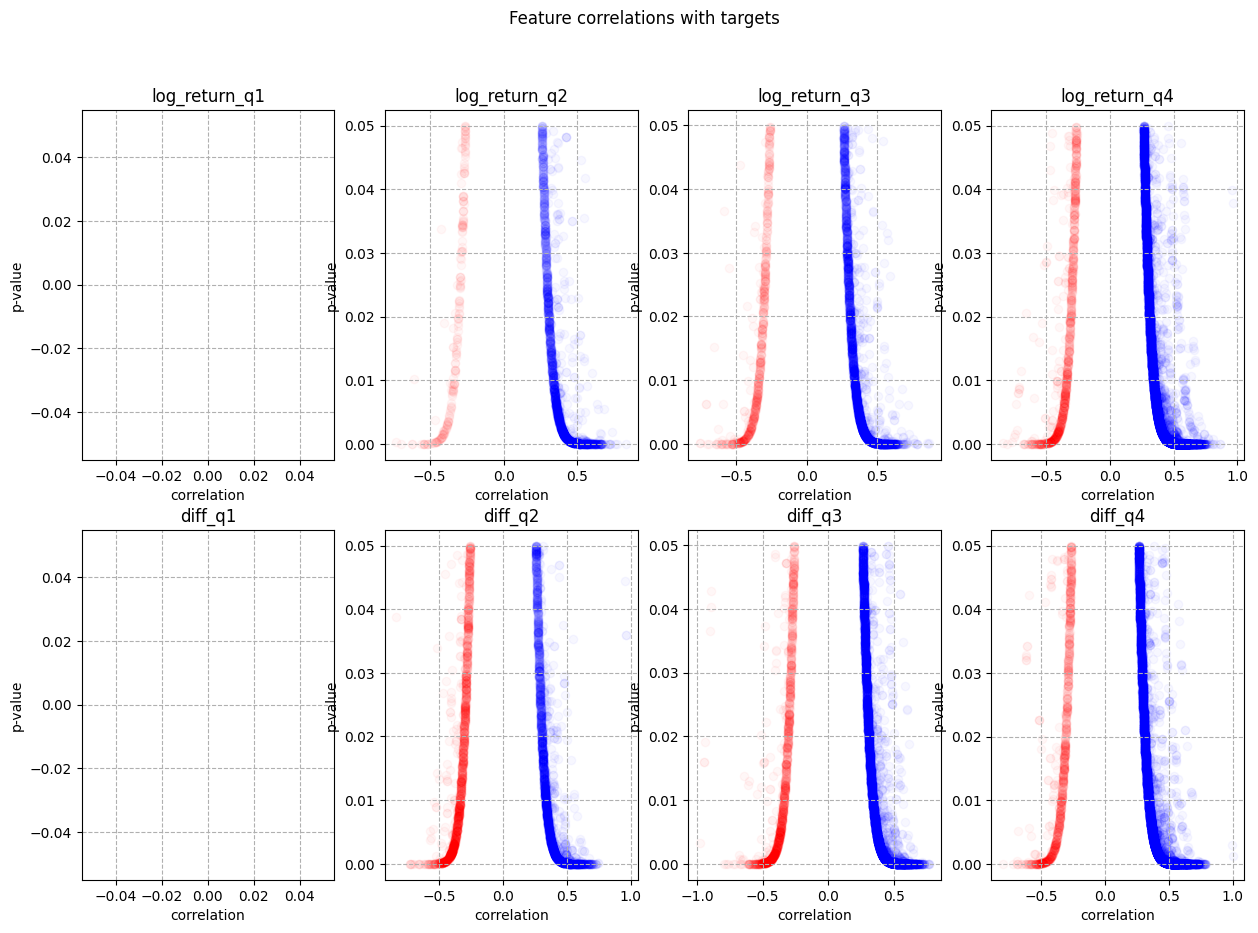

In [354]:
plot_correlation(reduced_correlation_data)